In [218]:
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib 
import matplotlib.pyplot as plt

In [219]:
path = 'credit.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')
##data = pd.DataFrame(data)
data = data.dropna(axis=0, how='any')

In [220]:
cible = data[15]##.values.reshape(-1,1)
###cible  = pd.DataFrame(data=cible)
cible = cible.replace(to_replace='+', value=1)
cible = cible.replace(to_replace='-', value=0)

In [221]:
cible.shape

(653,)

In [222]:
data = data.drop(15, axis=1)

In [223]:
sous_ensemble = data[[1,2,7,13,14]]
sous_ensemble = sous_ensemble.astype(float)

NaiveBayesSimple

In [232]:
gnb = GaussianNB()
y_pred_NBS_proba = gnb.fit(sous_ensemble, cible).predict_proba(sous_ensemble)
y_pred_NBS = gnb.fit(sous_ensemble, cible).predict(sous_ensemble)

0.63221572412748883

Qualité Modèle

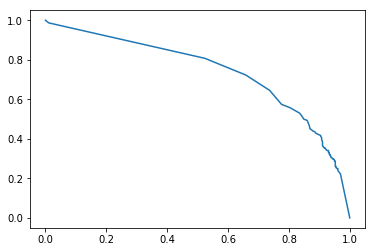

In [227]:
accuracy_NBS = sklearn.metrics.accuracy_score(cible, y_pred_NBS)
AUC_NBS = sklearn.metrics.roc_auc_score(cible, y_pred_NBS)
ROC = ROC_curves(pred=y_pred_NBS_proba, res=cible)
ROC.plot_it()

In [228]:
accuracy_NBS


0.66003062787136291

Defdinition Courbe ROC

In [206]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count

def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count

def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count

def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count



class ROC_curves:
    def __init__(self, pred = y_pred, res = cible, gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()

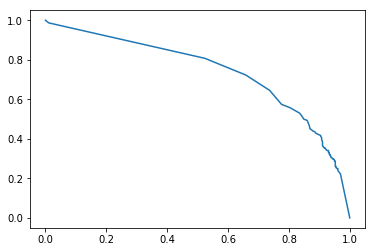

In [207]:
ROC = ROC_curves()
ROC.plot_it()